# Data Exploring

    - 중외제약 7개 자재내역에 대한 수요예측

In [25]:
# DataFrame
import numpy as np
import pandas as pd

import holidays

# Visualization
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.dates as mdates

import seaborn as sns

# Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

# font Setting
plt.rc('font', family='NanumGothic')

In [26]:
df = pd.read_excel('../Data/JW/JW_Data.xlsx', sheet_name=1)
df.rename(columns={'증빙일': 'Date', '납품수량': 'y', '자재내역': 'Product'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,년도,판매문서,현재팀,내역,DChl,내역.1,판매처,이름1,간납처,...,품목군내역,지점명,현재사원명,사업부,지점,품목,SOrg.,SaTy,주문사원,주문사원명
0,2015-02-23,2015,2234423,B74,일반_주문(중외제약),18,유통관리팀,1013386,(주)경동사,NaN,...,가나칸,유통사업부,이상훈,111127,1244,40,1111,ZB01,19990954,이승환
1,2015-02-23,2015,2234429,B74,일반_주문(중외제약),18,유통관리팀,1013386,(주)경동사,NaN,...,가나칸,유통사업부,이상훈,111127,1244,40,1111,ZB01,19990954,이승환
2,2015-02-23,2015,2234432,B74,일반_주문(중외제약),18,유통관리팀,1013386,(주)경동사,NaN,...,가나칸,유통사업부,이상훈,111127,1244,40,1111,ZB01,19990954,이승환
3,2015-02-23,2015,2234436,B74,일반_주문(중외제약),18,유통관리팀,1013386,(주)경동사,NaN,...,가나칸,유통사업부,이상훈,111127,1244,40,1111,ZB01,19990954,이승환
4,2015-02-23,2015,2234437,B74,일반_주문(중외제약),18,유통관리팀,1013386,(주)경동사,NaN,...,가나칸,유통사업부,이상훈,111127,1244,40,1111,ZB01,19990954,이승환


In [224]:
df = pd.read_csv('../Data/HS/hansol_paper_sales_daily.csv')
df.rename(columns={'ts':'Date', 'brand_code':'Product', 'qty':'y'}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Product,y,cat1,cat2,year,month,adi,cv,non_zero_periods,pattern
0,2018-01-16,1311A,8208.0,기타,41003.0,2018,1,16.37,0.3,122,Intermittent
1,2018-01-17,1311A,22500.0,기타,41003.0,2018,1,16.37,0.3,122,Intermittent
2,2018-01-18,1311A,0.0,기타,41003.0,2018,1,16.37,0.3,122,Intermittent
3,2018-01-19,1311A,0.0,기타,41003.0,2018,1,16.37,0.3,122,Intermittent
4,2018-01-20,1311A,0.0,기타,41003.0,2018,1,16.37,0.3,122,Intermittent


In [225]:
df.columns

Index(['Date', 'Product', 'y', 'cat1', 'cat2', 'year', 'month', 'adi', 'cv',
       'non_zero_periods', 'pattern'],
      dtype='object')

In [29]:
# 일일 데이터로 합계
def aggregate_df(df):
    tmp_df = df[['Date', 'Product', 'y']].copy()
    
    # 'Date'을 기준으로 일일합계 계산
    agg_df = tmp_df.groupby(['Date', 'Product'])['y'].sum().reset_index()
    agg_df.sort_values(['Product', 'Date']).reset_index(drop=True)
    return agg_df

In [28]:
# 수요가 없는 날을 0으로 채움 
def fill_zero_date(df, show_product_date=True):
    # 결측 날짜(missing dates를 구함)
    missing_dates = {}
    for product in df['Product'].unique():
        min_date = df[df['Product'] == product]['Date'].min()
        max_date = df[df['Product'] == product]['Date'].max()
        if show_product_date:
            print(f'{product} \n시작일: \t{min_date} \n마지막일: \t{max_date}')
            print()
    
        all_dates = pd.date_range(start=min_date, end='2022-12-31')
        
        actual_dates = df[df['Product'] == product]['Date'].unique()
        actual_dates = pd.to_datetime(actual_dates)
        
        missing = all_dates.difference(actual_dates)
        missing_dates[product] = missing
        
    # 결측값 수요 0으로 채움
    missing_rows = []
    for item, dates in missing_dates.items():
        for date in dates:
            missing_rows.append({'Date': date, 'Product': item, 'y': 0})
    
    missing_df = pd.DataFrame(missing_rows)
    
    # 누락된 날짜를 갖는 새로운 데이터 프레임을 원래의 데이터 프레임에 추가
    df = pd.concat([df, missing_df], ignore_index=True)
    
    # 결과를 출력합니다.
    df.sort_values(['Product', 'Date'], inplace=True)
    df = df.reset_index(drop=True)
   
    return df

In [231]:
code_list = ['6190', '6627', '6218', '6125', '6131', '6207', '3622', '3524', '4008J', '4010J', '3302', '2213', '2210', '2220', '2221', '2213.', '9200', '2221A', '2275', '3704']

In [235]:
df = df[df['Product'].isin(code_list)].reset_index(drop=True)

In [30]:
agg_df = aggregate_df(df)
filled_df = fill_zero_date(agg_df)

가나칸정-500T 
시작일: 	2015-02-23 00:00:00 
마지막일: 	2022-12-30 00:00:00

트루패스구강붕해정8mg-30T 
시작일: 	2015-07-27 00:00:00 
마지막일: 	2022-12-30 00:00:00

엔커버200ml옥수수맛 
시작일: 	2017-04-07 00:00:00 
마지막일: 	2022-12-30 00:00:00

위너프페리-1085MLTPN2 
시작일: 	2017-12-21 00:00:00 
마지막일: 	2022-12-30 00:00:00

리바로정2mg-30T 
시작일: 	2020-10-06 00:00:00 
마지막일: 	2022-12-30 00:00:00

리바로젯정2/10mg-30T 
시작일: 	2021-09-27 00:00:00 
마지막일: 	2022-12-31 00:00:00

듀락칸이지시럽(스틱)-15mLx100P 
시작일: 	2022-01-03 00:00:00 
마지막일: 	2022-12-29 00:00:00



In [6]:
# 수요 추이를 plotting
def plot_y(df):
    df['Date'] = pd.to_datetime(df['Date'])
    # Product 별로 서브플롯 그리기
    unique_materials = df['Product'].unique()
    fig, axs = plt.subplots(len(unique_materials), 1, figsize=(10, 5*len(unique_materials)))
    
    for idx, material in enumerate(unique_materials):
        subset = df[df['Product'] == material]
        axs[idx].plot(subset['Date'], subset['y'], color='navy', label=material)
        #axs[idx].legend()
        axs[idx].set_title(material, fontsize=14)
        axs[idx].set_xlabel('Date')
        axs[idx].set_ylabel('y')
    
    plt.tight_layout(pad=1)
    plt.show()

In [7]:
filled_df

,Date,Product,y
0,2015-02-23,가나칸정-500T,2387.0
1,2015-02-24,가나칸정-500T,143.0
2,2015-02-25,가나칸정-500T,2037.0
3,2015-02-26,가나칸정-500T,0.0
4,2015-02-27,가나칸정-500T,0.0
...,...,...,...
11152,2022-12-27,트루패스구강붕해정8mg-30T,128.0
11153,2022-12-28,트루패스구강붕해정8mg-30T,0.0
11154,2022-12-29,트루패스구강붕해정8mg-30T,10.0
11155,2022-12-30,트루패스구강붕해정8mg-30T,261.0


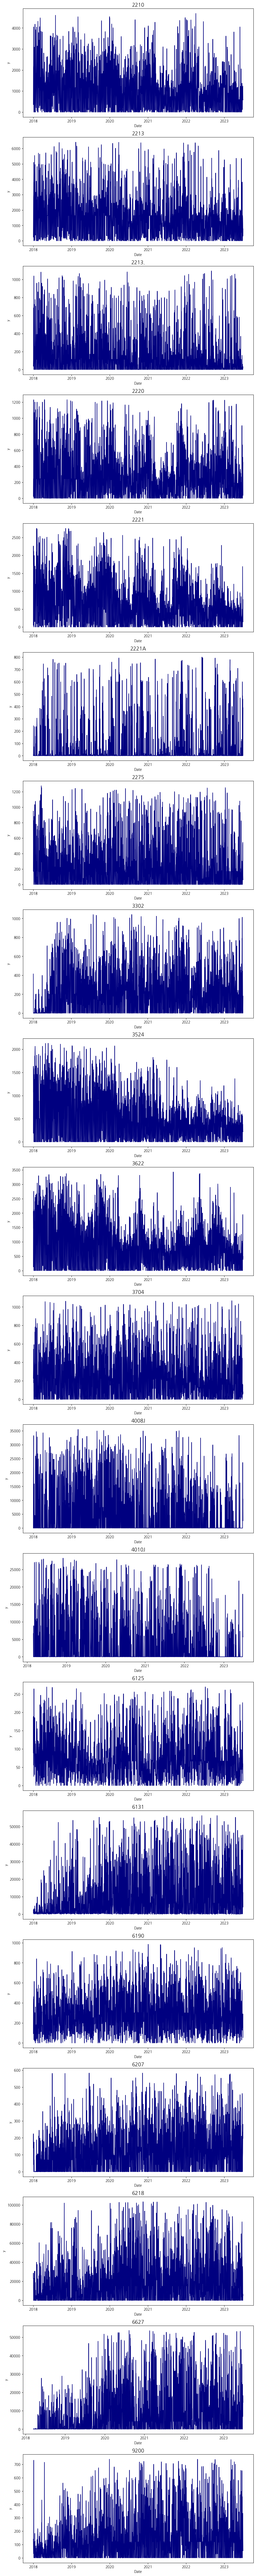

In [251]:
plot_y(tuned_df)

In [31]:
# 이상치를 중앙값으로 대치하는 함수
def replace_upper_outliers_with_median(group):
    Q1 = group['y'].quantile(0.25)
    Q3 = group['y'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_replace = group['y'].median()
    
    # Q3 + IQR*1.5 보다 큰 값을 이상치로 판정
    outlier_mask = group['y'] > (Q3 + 1.5*IQR)
    
    # 이상치를 중앙값으로 대치
    group.loc[outlier_mask, 'y'] = outlier_replace
    return group

In [32]:
tuned_df = filled_df.groupby('Product').apply(replace_upper_outliers_with_median).reset_index(drop=True)

In [33]:
tuned_df

,Date,Product,y
0,2015-02-23,가나칸정-500T,77.0
1,2015-02-24,가나칸정-500T,143.0
2,2015-02-25,가나칸정-500T,77.0
3,2015-02-26,가나칸정-500T,0.0
4,2015-02-27,가나칸정-500T,0.0
...,...,...,...
11152,2022-12-27,트루패스구강붕해정8mg-30T,128.0
11153,2022-12-28,트루패스구강붕해정8mg-30T,0.0
11154,2022-12-29,트루패스구강붕해정8mg-30T,10.0
11155,2022-12-30,트루패스구강붕해정8mg-30T,261.0


In [34]:
# 외부 환경 변수
ex_df = pd.read_excel('../Data/Feature/ext_var.xlsx')
ex_df['ts'] = pd.to_datetime(ex_df['ts'])
ex_df.insert(0, '년월', ex_df['ts'].dt.to_period('M')) # For merged key
ex_df

,년월,ts,경제심리지수_경제심리지수(순환변동치),경제심리지수_경제심리지수(원계열),국제수지_경상수지,기업경기실사지수(실적)_경 공 업,기업경기실사지수(실적)_내수기업,기업경기실사지수(실적)_대 기 업,기업경기실사지수(실적)_비제조업,기업경기실사지수(실적)_서비스업,...,소비자물가지수(2020＝100)_울산광역시,소비자물가지수(2020＝100)_인천광역시,소비자물가지수(2020＝100)_전국,소비자물가지수(2020＝100)_전라남도,소비자물가지수(2020＝100)_전라북도,소비자물가지수(2020＝100)_제주특별자치도,소비자물가지수(2020＝100)_충청남도,소비자물가지수(2020＝100)_충청북도,수입물가지수(기본분류)_총지수,수출물가지수(기본분류)_총지수
0,2003-01,2003-01-01,95.7,101.0,-2192.9,79,84,94,80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-02,2003-02-01,95.6,102.3,-740.2,72,76,84,71,NaN,...,69.240,69.614,69.213,69.346,69.100,69.764,69.803,69.864,73.61,109.51
2,2003-03,2003-03-01,95.6,92.3,-143.6,68,74,81,68,NaN,...,70.127,70.504,70.034,70.248,70.314,70.472,70.573,70.830,72.37,108.55
3,2003-04,2003-04-01,95.9,98.0,-1008.2,67,78,84,72,NaN,...,69.747,70.377,69.908,70.185,70.187,70.279,70.188,70.573,69.32,105.35
4,2003-05,2003-05-01,96.5,96.1,-51.3,70,77,84,71,NaN,...,69.620,70.122,69.782,69.927,69.803,70.021,70.060,70.187,69.45,105.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2023-03,2023-03-01,92.2,91.5,158.1,63,74,69,74,77.0,...,110.360,110.780,110.560,110.940,110.710,110.960,111.510,111.360,120.16,102.02
243,2023-04,2023-04-01,92.4,93.8,-792.6,65,74,68,74,76.0,...,110.560,111.000,110.800,111.400,110.860,111.220,111.680,111.710,119.36,101.27
244,2023-05,2023-05-01,92.9,94.2,1927.2,64,74,71,78,80.0,...,111.070,111.330,111.130,111.740,111.120,111.340,111.960,112.100,114.91,99.13
245,2023-06,2023-06-01,93.5,95.7,NaN,64,78,75,77,79.0,...,111.080,111.230,111.120,111.620,111.020,111.250,111.860,112.090,113.69,98.67


In [184]:
for i in ex_df.columns:
    print(i)

년월
ts
경제심리지수_경제심리지수(순환변동치)
경제심리지수_경제심리지수(원계열)
국제수지_경상수지
기업경기실사지수(실적)_경 공 업
기업경기실사지수(실적)_내수기업
기업경기실사지수(실적)_대 기 업
기업경기실사지수(실적)_비제조업
기업경기실사지수(실적)_서비스업
기업경기실사지수(실적)_수출기업
기업경기실사지수(실적)_전 산 업
기업경기실사지수(실적)_제 조 업
기업경기실사지수(실적)_중소기업
기업경기실사지수(실적)_중화학공업
기업경기실사지수(전망)_경 공 업
기업경기실사지수(전망)_내수기업
기업경기실사지수(전망)_대 기 업
기업경기실사지수(전망)_비제조업
기업경기실사지수(전망)_서비스업
기업경기실사지수(전망)_수출기업
기업경기실사지수(전망)_전 산 업
기업경기실사지수(전망)_제 조 업
기업경기실사지수(전망)_중소기업
기업경기실사지수(전망)_중화학공업
설비투자지수_가정용 전기기기
설비투자지수_금속 및 금속제품
설비투자지수_기계류
설비투자지수_기타기기
설비투자지수_기타운송장비
설비투자지수_기타제품
설비투자지수_영상 음향 및 통신기기
설비투자지수_운송장비
설비투자지수_일반기계류
설비투자지수_일반산업용기계
설비투자지수_자동차
설비투자지수_전기 및 전자기기
설비투자지수_전기기기 및 장치
설비투자지수_정밀기기
설비투자지수_총지수
설비투자지수_컴퓨터사무용기계
설비투자지수_특수산업용기계
소비자물가지수(2020＝100)_강원도
소비자물가지수(2020＝100)_경기도
소비자물가지수(2020＝100)_경상남도
소비자물가지수(2020＝100)_경상북도
소비자물가지수(2020＝100)_광주광역시
소비자물가지수(2020＝100)_대구광역시
소비자물가지수(2020＝100)_대전광역시
소비자물가지수(2020＝100)_부산광역시
소비자물가지수(2020＝100)_서울특별시
소비자물가지수(2020＝100)_세종특별자치시
소비자물가지수(2020＝100)_울산광역시
소비자물가지수(2020＝100)_인천광역시
소비자물가지수(2020＝100)_전국
소비자물가지수(2020＝100)_전라남도
소비자물가

In [35]:
# 피쳐 선별
ex_df = ex_df[['년월', 
               '소비자물가지수(2020＝100)_전국',
               '기업경기실사지수(실적)_제 조 업',
               '기업경기실사지수(전망)_제 조 업',
               '경제심리지수_경제심리지수(순환변동치)',
               '경제심리지수_경제심리지수(원계열)',
               '설비투자지수_총지수',
               '수입물가지수(기본분류)_총지수',
               '수출물가지수(기본분류)_총지수']]

ex_df.head()

,년월,소비자물가지수(2020＝100)_전국,기업경기실사지수(실적)_제 조 업,기업경기실사지수(전망)_제 조 업,경제심리지수_경제심리지수(순환변동치),경제심리지수_경제심리지수(원계열),설비투자지수_총지수,수입물가지수(기본분류)_총지수,수출물가지수(기본분류)_총지수
0,2003-01,NaN,83,NaN,95.7,101.0,NaN,NaN,NaN
1,2003-02,69.213,77,NaN,95.6,102.3,62.2,73.61,109.51
2,2003-03,70.034,75,91.0,95.6,92.3,70.4,72.37,108.55
3,2003-04,69.908,81,79.0,95.9,98.0,64.7,69.32,105.35
4,2003-05,69.782,77,87.0,96.5,96.1,60.4,69.45,105.30


In [186]:
tuned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168919 entries, 0 to 1168918
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Date     1168919 non-null  datetime64[ns]
 1   Product  1168919 non-null  object        
 2   y        1168919 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 26.8+ MB


In [36]:
# 월, 일, 요일 변수 추가
tuned_df['월'] = tuned_df['Date'].dt.month
tuned_df['일'] = tuned_df['Date'].dt.day
tuned_df['요일'] = tuned_df['Date'].dt.dayofweek
tuned_df['년월'] = tuned_df['Date'].dt.to_period('M')

In [37]:
# 공휴일 변수 추가
kr_holidays = holidays.SouthKorea()

tuned_df['공휴일여부'] = tuned_df['Date'].apply(lambda x: x in kr_holidays).astype('int')

In [38]:
# 외부 환경 변수와 일별 데이터 병합
ex_merged_df = pd.merge(tuned_df, ex_df, on='년월', how='left')

In [39]:
ex_merged_df

,Date,Product,y,월,일,요일,년월,공휴일여부,소비자물가지수(2020＝100)_전국,기업경기실사지수(실적)_제 조 업,기업경기실사지수(전망)_제 조 업,경제심리지수_경제심리지수(순환변동치),경제심리지수_경제심리지수(원계열),설비투자지수_총지수,수입물가지수(기본분류)_총지수,수출물가지수(기본분류)_총지수
0,2015-02-23,가나칸정-500T,77.0,2,23,0,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1
1,2015-02-24,가나칸정-500T,143.0,2,24,1,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1
2,2015-02-25,가나칸정-500T,77.0,2,25,2,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1
3,2015-02-26,가나칸정-500T,0.0,2,26,3,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1
4,2015-02-27,가나칸정-500T,0.0,2,27,4,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,2022-12-27,트루패스구강붕해정8mg-30T,128.0,12,27,1,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8
11153,2022-12-28,트루패스구강붕해정8mg-30T,0.0,12,28,2,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8
11154,2022-12-29,트루패스구강붕해정8mg-30T,10.0,12,29,3,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8
11155,2022-12-30,트루패스구강붕해정8mg-30T,261.0,12,30,4,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8


### 날씨 변수 추가

In [40]:
weather_df = pd.read_csv('../Data/Feature/2015_2022_weather.csv', encoding="utf-8-sig")
weather_df.rename(columns={'일시': 'Date'}, inplace=True)

weather_df['Date'] = pd.to_datetime(weather_df['Date'])

In [41]:
# 필요한 날씨 속성만 추출
weather_df = weather_df[['Date', '평균기온(°C)','일강수량(mm)', '평균 풍속(m/s)']].copy()
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
weather_df

,Date,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,2015-01-01,-6.4,0.0,3.0
1,2015-01-02,-4.6,0.0,2.0
2,2015-01-03,-1.5,0.0,1.2
3,2015-01-04,3.9,0.0,1.0
4,2015-01-05,4.4,0.5,1.1
...,...,...,...,...
2917,2022-12-27,-3.2,0.0,0.8
2918,2022-12-28,-4.2,0.0,1.4
2919,2022-12-29,-4.0,0.0,0.9
2920,2022-12-30,-2.8,0.0,1.0


In [42]:
# 결측값은 그 전날의 날씨로 대체
weather_df['평균기온(°C)'].fillna(method='ffill', inplace=True)
weather_df['평균 풍속(m/s)'].fillna(method='ffill', inplace=True)

In [216]:
weather_df.isna().sum()

Date          0
평균기온(°C)      0
일강수량(mm)      0
평균 풍속(m/s)    0
dtype: int64

In [43]:
all_merged_df = pd.merge(ex_merged_df, weather_df, on='Date', how='left')

In [44]:
all_merged_df

,Date,Product,y,월,일,요일,년월,공휴일여부,소비자물가지수(2020＝100)_전국,기업경기실사지수(실적)_제 조 업,기업경기실사지수(전망)_제 조 업,경제심리지수_경제심리지수(순환변동치),경제심리지수_경제심리지수(원계열),설비투자지수_총지수,수입물가지수(기본분류)_총지수,수출물가지수(기본분류)_총지수,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,2015-02-23,가나칸정-500T,77.0,2,23,0,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,1.8,0.0,1.6
1,2015-02-24,가나칸정-500T,143.0,2,24,1,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,3.1,0.0,1.3
2,2015-02-25,가나칸정-500T,77.0,2,25,2,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,6.3,0.5,1.7
3,2015-02-26,가나칸정-500T,0.0,2,26,3,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,2.0,0.5,2.8
4,2015-02-27,가나칸정-500T,0.0,2,27,4,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,-0.6,0.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,2022-12-27,트루패스구강붕해정8mg-30T,128.0,12,27,1,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-3.2,0.0,0.8
11153,2022-12-28,트루패스구강붕해정8mg-30T,0.0,12,28,2,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-4.2,0.0,1.4
11154,2022-12-29,트루패스구강붕해정8mg-30T,10.0,12,29,3,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-4.0,0.0,0.9
11155,2022-12-30,트루패스구강붕해정8mg-30T,261.0,12,30,4,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-2.8,0.0,1.0


In [45]:
import re

# 한글만 추출하는 함수
def extract_korean(text):
    return ''.join(re.findall('[가-힣]+', text))

# Product 열에 함수 적용
all_merged_df['Product'] = all_merged_df['Product'].apply(extract_korean)

In [46]:
all_merged_df

,Date,Product,y,월,일,요일,년월,공휴일여부,소비자물가지수(2020＝100)_전국,기업경기실사지수(실적)_제 조 업,기업경기실사지수(전망)_제 조 업,경제심리지수_경제심리지수(순환변동치),경제심리지수_경제심리지수(원계열),설비투자지수_총지수,수입물가지수(기본분류)_총지수,수출물가지수(기본분류)_총지수,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,2015-02-23,가나칸정,77.0,2,23,0,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,1.8,0.0,1.6
1,2015-02-24,가나칸정,143.0,2,24,1,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,3.1,0.0,1.3
2,2015-02-25,가나칸정,77.0,2,25,2,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,6.3,0.5,1.7
3,2015-02-26,가나칸정,0.0,2,26,3,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,2.0,0.5,2.8
4,2015-02-27,가나칸정,0.0,2,27,4,2015-02,0,94.587,74,73.0,98.7,102.4,88.5,105.28,103.1,-0.6,0.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,2022-12-27,트루패스구강붕해정,128.0,12,27,1,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-3.2,0.0,0.8
11153,2022-12-28,트루패스구강붕해정,0.0,12,28,2,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-4.2,0.0,1.4
11154,2022-12-29,트루패스구강붕해정,10.0,12,29,3,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-4.0,0.0,0.9
11155,2022-12-30,트루패스구강붕해정,261.0,12,30,4,2022-12,0,109.280,71,69.0,93.3,91.5,145.9,120.38,102.8,-2.8,0.0,1.0


In [96]:
weather_df.isna().sum()

지점                        0
Date                      0
평균기온(°C)                  9
최저기온(°C)                  8
최저기온 시각(hhmi)             8
최고기온(°C)                  8
최고기온 시각(hhmi)             8
1시간 최다강수량(mm)          2558
1시간 최다 강수량 시각(hhmi)    2821
일강수량(mm)                  0
최대 순간 풍속(m/s)             8
최대 순간풍속 시각(hhmi)        739
평균 풍속(m/s)               10
최대 순간 풍속 풍향(deg)         11
dtype: int64

In [47]:
# 일일 데이터 저장
all_merged_df.to_csv('../Data/JW/JW_merged_data.csv', index=False, encoding="utf-8-sig")

In [ ]:
def lasso_feature_selection(data, column_name, max_col_num = None):

    y_index = data.columns.get_loc(column_name)
  
    # 데이터프레임에서 y값 열 추출
    y = data.iloc[:, y_index]
    
    # 데이터프레임에서 y값 열을 제외한 나머지 열을 X로 설정
    X = data.drop(data.columns[y_index], axis=1)
    
    # 하이퍼파라미터 설정
    alpha_list = [0.00001, 0.0001, 0.001,0.01, 0.1, 1, 10, 100, 1000]
    lasso = LassoCV(alphas=alpha_list).fit(X,y) 
    
    # 각 변수의 계수 출력
    coefficients = pd.Series(lasso.coef_, index=X.columns)
    # print("각 변수의 계수:")
    # print(coefficients)
    
    # 선택된 변수만 보여주기
    selected_variables = coefficients[coefficients != 0]

    if max_col_num:
        selected_variables = selected_variables.aggregate(np.abs)
        selected_variables = selected_variables.sort_values(ascending=False)
        selected_variables = selected_variables.iloc[:max_col_num]
    
    # 선택된 변수와 y값만 포함된 데이터 반환
    selected_data = data[selected_variables.index]
    selected_data[y.name] = y

    print("\n선택된 변수:")
    print(coefficients[selected_variables.index])
    return selected_data, lasso, coefficients # 선택된 피쳐값, 피쳐를 선택한 모델, 각 피쳐별 coefficient값을 리턴하는 함수.

In [254]:
all_ex_df

,ts,경기종합지수(2020＝100)구성지표시계열(10차)_건설기성액(실질)(십억원),경기종합지수(2020＝100)구성지표시계열(10차)_건설수주액(실질)(십억원),경기종합지수(2020＝100)구성지표시계열(10차)_경제심리지수,경기종합지수(2020＝100)구성지표시계열(10차)_광공업생산지수(2020＝100),경기종합지수(2020＝100)구성지표시계열(10차)_기계류내수출하지수(선박제외)(2020＝100),경기종합지수(2020＝100)구성지표시계열(10차)_내수출하지수(2020＝100),경기종합지수(2020＝100)구성지표시계열(10차)_동행종합지수(2020＝100),경기종합지수(2020＝100)구성지표시계열(10차)_생산자제품재고지수(2020＝100),경기종합지수(2020＝100)구성지표시계열(10차)_서비스업생산지수(도소매업제외)(2020＝100),...,전산업생산지수(원지수)_공공행정,전산업생산지수(원지수)_광공업,전산업생산지수(원지수)_서비스업,전산업생산지수(원지수)_전산업생산지수(농림어업제외),기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업,기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.1,기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.2,기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.3,기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.4,기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.5
0,200302,8237.5,8048.8,100.1,51.7,88.8,73.5,57.7,42.9,60.7,...,54.7,48.1,60.2,56.4,NaN,NaN,NaN,NaN,NaN,NaN
1,200303,8217.6,7904.5,98.5,51.8,87.6,72.9,57.7,43.5,61.3,...,60.8,54.2,66.6,63.0,NaN,NaN,NaN,NaN,NaN,NaN
2,200304,8153.6,7858.6,97.5,51.9,86.3,72.0,57.6,44.4,61.8,...,64.9,53.0,66.2,62.8,NaN,NaN,NaN,NaN,NaN,NaN
3,200305,8178.0,7624.8,95.5,51.9,85.4,71.6,57.8,44.8,62.5,...,61.0,52.0,66.6,62.7,NaN,NaN,NaN,NaN,NaN,NaN
4,200306,8357.3,8831.2,95.7,52.1,85.2,71.7,58.0,45.1,62.9,...,62.0,52.3,65.8,63.2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,202303,10530.3,13946.3,91.1,101.6,102.9,97.1,109.5,117.9,116.7,...,124.3,108.9,117.5,114.9,110.0,111.4,120.3,115.2,114.8,104.9
242,202304,10542.9,10440.7,92.3,102.0,101.3,96.4,110.0,120.1,117.6,...,97.3,101.6,113.9,108.4,103.3,98.3,129.2,103.6,103.8,105.8
243,202305,10472.9,10297.3,93.2,104.4,100.2,96.7,110.3,122.1,117.4,...,99.9,104.8,114.9,110.0,107.2,105.3,129.8,105.2,105.7,105.7
244,202306,10466.4,10850.7,94.6,104.8,100.5,96.9,110.4,122.0,117.4,...,121.8,108.0,118.2,115.4,110.3,113.8,118.5,113.0,114.0,104.0


In [222]:
all_ex_df = pd.read_csv('../Data/Feature/ext_var_20230821.csv', encoding="utf-8-sig")

all_ex_df.columns

Index(['ts', '경기종합지수(2020＝100)구성지표시계열(10차)_건설기성액(실질)(십억원)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_건설수주액(실질)(십억원)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_경제심리지수',
       '경기종합지수(2020＝100)구성지표시계열(10차)_광공업생산지수(2020＝100)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_기계류내수출하지수(선박제외)(2020＝100)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_내수출하지수(2020＝100)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_동행종합지수(2020＝100)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_생산자제품재고지수(2020＝100)',
       '경기종합지수(2020＝100)구성지표시계열(10차)_서비스업생산지수(도소매업제외)(2020＝100)',
       ...
       '전산업생산지수(원지수)_공공행정', '전산업생산지수(원지수)_광공업', '전산업생산지수(원지수)_서비스업',
       '전산업생산지수(원지수)_전산업생산지수(농림어업제외)', '기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업',
       '기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.1',
       '기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.2',
       '기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.3',
       '기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.4',
       '기업규모별제조업생산지수(매출액기준)(2020＝100)_제조업.5'],
      dtype='object', length=265)

In [223]:
for c in all_ex_df.columns:
    print(c)

ts
경기종합지수(2020＝100)구성지표시계열(10차)_건설기성액(실질)(십억원)
경기종합지수(2020＝100)구성지표시계열(10차)_건설수주액(실질)(십억원)
경기종합지수(2020＝100)구성지표시계열(10차)_경제심리지수
경기종합지수(2020＝100)구성지표시계열(10차)_광공업생산지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_기계류내수출하지수(선박제외)(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_내수출하지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_동행종합지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_생산자제품재고지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_서비스업생산지수(도소매업제외)(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_선행종합지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_소매판매액지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_소비자물가지수변화율(서비스)
경기종합지수(2020＝100)구성지표시계열(10차)_소비재수입액(실질)(백만불)
경기종합지수(2020＝100)구성지표시계열(10차)_수입액(실질)(백만불)
경기종합지수(2020＝100)구성지표시계열(10차)_수출입물가비율(2015＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_장단기금리차(%p)
경기종합지수(2020＝100)구성지표시계열(10차)_재고순환지표(%p)
경기종합지수(2020＝100)구성지표시계열(10차)_취업자수(천명)
경기종합지수(2020＝100)구성지표시계열(10차)_코스피(1980.1.4＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_후행종합지수(2020＝100)
경기종합지수(2020＝100)구성지표시계열(10차)_CP유통수익률(%p)
경기종합지수(2020＝100)(10차)_〔순환변동치전월차〕(p)
경기종합지수(2020＝10

In [137]:
not_zero_df = tuned_df[tuned_df['y']!=0].reset_index(drop=True)

## ADI-CV

- Average Demand Interval (ADI): 주문 사이의 평균 시간 간격
- Coefficient of Variation (CV): 평균과 표준 편차의 비율로서 변동성

In [138]:
def ADI(df):
    ADI_lst = []
    for prod in df['Product'].unique():
        tmp_df = df.loc[df['Product'] == prod].reset_index(drop=True)
        dvList = list() 
        
        for i in range(len(tmp_df)):
            # First interval
            if i == 0:
                interval = 0
                dvList.append(interval) 
            else:
            
                interval = (tmp_df.loc[i]['Date'] - tmp_df.loc[i-1]['Date']).days # interval days
                dvList.append(interval)
        tv = sum(dvList) / len(dvList)
        ADI_lst.append(tv)
        
    return ADI_lst

In [141]:
def CV(df):
    CV_lst = []
    for prod in df['Product'].unique():
        tmp_df = df.loc[df['Product'] == prod].reset_index(drop=True)['y']
        cv = np.std(tmp_df) / np.mean(tmp_df)
        CV_lst.append(cv)
    
    return CV_lst

In [142]:
def ADI_CV(df):
    ADI_lst = ADI(df)
    CV_lst = CV(df)
    # The standards of classification (Intermittent, Lumpy, Smooth, Erratic)

    ADI_CV_df= pd.DataFrame({'Product' : df['Product'].unique(),
                             'ADI' : ADI_lst,
                             'CV' : CV_lst,})
    return ADI_CV_df

def func(df) :
    if (df['ADI'] <= 1.34) & (df['CV'] >= 0 ) & (df['CV'] <= 0.49)  :
        return "Smooth"
    if (df['ADI'] > 1.34) & (df['CV'] > 0 ) & (df['CV'] < 0.49)  :
        return "Intermittent"
    if (df['ADI'] <= 1.34) & (df['CV'] >= 0.49)  :
        return "Erratic"
    if (df['ADI'] > 1.34) & (df['CV'] > 0.49)  :
        return "Lumpy"

In [127]:
tuned_df

,Date,Product,y,월,일,요일,년월,공휴일여부
0,2015-02-23,가나칸정-500T,77,2,23,0,2015-02,0
1,2015-02-24,가나칸정-500T,143,2,24,1,2015-02,0
2,2015-02-25,가나칸정-500T,77,2,25,2,2015-02,0
3,2015-02-26,가나칸정-500T,0,2,26,3,2015-02,0
4,2015-02-27,가나칸정-500T,0,2,27,4,2015-02,0
...,...,...,...,...,...,...,...,...
11152,2022-12-27,트루패스구강붕해정8mg-30T,128,12,27,1,2022-12,0
11153,2022-12-28,트루패스구강붕해정8mg-30T,0,12,28,2,2022-12,0
11154,2022-12-29,트루패스구강붕해정8mg-30T,10,12,29,3,2022-12,0
11155,2022-12-30,트루패스구강붕해정8mg-30T,261,12,30,4,2022-12,0


#### ADI-CV 이후, 수요 패턴 분석

In [171]:
ADI_CV_df = ADI_CV(new_df)

ADI_CV_df['Demand_pattern'] = ADI_CV_df.apply(lambda x : func(x), axis=1)

In [177]:
df[df['Product']=='2210']

,Date,Product,y,cat1,cat2,year,month,adi,cv,non_zero_periods,pattern
3944,2018-01-01,2210,357.510,인쇄,13009.0,2018,1,1.15,4.27,1749,Erratic
3945,2018-01-02,2210,2111.850,인쇄,13009.0,2018,1,1.15,4.27,1749,Erratic
3946,2018-01-03,2210,2220.100,인쇄,13009.0,2018,1,1.15,4.27,1749,Erratic
3947,2018-01-04,2210,4052.200,인쇄,13009.0,2018,1,1.15,4.27,1749,Erratic
3948,2018-01-05,2210,2892.618,인쇄,13009.0,2018,1,1.15,4.27,1749,Erratic
...,...,...,...,...,...,...,...,...,...,...,...
5946,2023-06-26,2210,1188.520,인쇄,13009.0,2023,6,1.15,4.27,1749,Erratic
5947,2023-06-27,2210,786.540,인쇄,13009.0,2023,6,1.15,4.27,1749,Erratic
5948,2023-06-28,2210,1241.114,인쇄,13009.0,2023,6,1.15,4.27,1749,Erratic
5949,2023-06-29,2210,618.430,인쇄,13009.0,2023,6,1.15,4.27,1749,Erratic


In [162]:
selected_df.reset_index(drop=True)
selected_product = selected_df['Product'].unique()

In [163]:
selected_product

array(['6131', '6190', '6125', '2213', '3622', '3524', '2210', '2221',
       '2220', '6627', '3704', '9200', '9201', '3520', '3631', '2275',
       '3302', '2213.', '6207', '8631', '9006', '6218', '2213A', '3622/',
       '9006/', '3524/', '9006G', '6131HH', '8671', '2213-1A', '6627HH',
       '2213-', '8631G', '2221.', '3622-', '3101A', '3301A', '2213/',
       '2221/', '3524-', '2270', '5232', '2221-', '5082', '6131L',
       '2221A', '8671G', '2222', '2269', '3306'], dtype=object)

In [170]:
new_df = not_zero_df[not_zero_df['Product'].isin(selected_product)]